# Drivers of Cost of Care - Exploratory Data Analysis

The dataset is imported into my local postgres SQL database in it's original form. I used SQL to do most of the data cleaning and created some new variables. You may refer to sql.sql for the code.

**New Variables**

* Length of Stay (los)
* Age at admission (age_at_adm)
* BMI
* BMI Risk
* Total number of medical history (no_med_hist)
* Average bill per day (avg_bill)
* Total Bill (tot_bill)

**Data Clean-up**

* Converted categorical features into numerical codes
* Standardised the data type
* Impute null values

Total number of data = 3,400 (per row per admission)

In [180]:
# import packages

import psycopg2
import pandas as pd
import numpy as np
from scipy import stats

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# display options

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows',200)
pd.set_option('display.max_colwidth',200)

In [181]:
# connect to database

engine = psycopg2.connect("dbname=holmusk user=joannasyeow")
f = open("codes/sql.sql", "r")
sql = f.read()
df = pd.read_sql(sql, con=engine)

In [182]:
# have a quick look at our data

df.head()

,id_,patient_id,mth_adm,yr_adm,los,age_bin,gender_c,resident_status_c,race_c,age_at_adm,readm30day,medical_history_1,medical_history_2_c,medical_history_3_c,medical_history_4,medical_history_5_c,medical_history_6,medical_history_7,no_med_hist,preop_medication_1,preop_medication_2,preop_medication_3,preop_medication_4,preop_medication_5,preop_medication_6,no_meds,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,no_sym,lab_result_1,lab_result_2,lab_result_3,no_lab,weight,height,bmi,bmi_risk,avg_bill,tot_bill
0,8461069832,00225710a878eff524a1d13be817e8e2,4.0,2014.0,12,35,1,0,2,31,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,13.4,27.9,96.0,137.3,66.9,155.0,27.85,high,432.55,5190.57
1,5621737529,0029d90eb654699c18001c17efb0f129,11.0,2012.0,13,>65,1,0,2,69,0,0,1,0,0,0,1,0,2,0,0,0,0,1,0,1,0,1,0,0,1,2,16.7,26.5,109.0,152.2,89.1,160.0,34.80,high,1738.58,22601.50
2,9921582850,0040333abd68527ecb53e1db9073f52e,1.0,2013.0,12,45,0,0,1,41,0,0,1,0,0,0,0,1,2,0,0,1,1,1,0,3,0,1,0,0,1,2,14.8,25.2,96.0,136.0,79.5,172.0,26.87,moderate,1453.93,17447.18
3,7239419545,00473b58e3dc8ae37b3cb34069705083,2.0,2014.0,5,45,1,0,2,38,0,1,0,0,0,0,0,0,1,0,0,1,1,1,0,3,0,1,1,1,0,3,14.9,28.7,122.0,165.6,81.1,160.0,31.68,high,3057.18,15285.88
4,9476531069,0078662d1d983dde68ea057c42d5b5cf,4.0,2012.0,12,>65,0,2,3,70,0,0,1,0,0,0,1,0,2,1,0,1,1,1,0,4,0,1,0,1,1,3,14.2,27.2,89.0,130.4,74.7,173.0,24.96,moderate,6123.16,73477.87


In [183]:
df.describe()

,id_,mth_adm,yr_adm,los,gender_c,resident_status_c,race_c,age_at_adm,readm30day,medical_history_1,medical_history_2_c,medical_history_3_c,medical_history_4,medical_history_5_c,medical_history_6,medical_history_7,no_med_hist,preop_medication_1,preop_medication_2,preop_medication_3,preop_medication_4,preop_medication_5,preop_medication_6,no_meds,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,no_sym,lab_result_1,lab_result_2,lab_result_3,no_lab,weight,height,bmi,avg_bill,tot_bill
count,3.400000e+03,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000
mean,8.004280e+09,6.484412,2013.009706,11.051176,0.500588,0.246176,2.214412,52.542647,0.003529,0.169118,0.290000,0.136176,0.052059,0.058235,0.254706,0.254412,1.214706,0.503824,0.591176,0.820882,0.523235,0.819706,0.744118,4.002941,0.619706,0.662353,0.544706,0.726471,0.526765,3.080000,14.469882,27.431529,99.489706,141.391118,78.748441,165.084412,28.958947,2146.372882,21859.071256
std,1.610701e+09,3.414452,1.422167,2.850140,0.500073,0.529492,0.691795,14.681475,0.059313,0.374911,0.453829,0.343026,0.222178,0.234222,0.435760,0.435594,0.971992,0.500059,0.491689,0.383507,0.499533,0.384489,0.436420,1.106823,0.485530,0.472977,0.498071,0.445836,0.499357,1.068724,1.747323,2.463844,15.254453,15.602055,10.975076,6.973678,4.140672,1317.204150,10155.336729
min,1.350319e+09,1.000000,2011.000000,1.000000,0.000000,0.000000,1.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.100000,19.700000,52.000000,93.700000,48.000000,151.000000,17.510000,245.510000,2946.100000
25%,7.094585e+09,4.000000,2012.000000,9.000000,0.000000,0.000000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,13.200000,25.800000,88.000000,130.200000,71.200000,160.000000,26.160000,1314.530000,14793.372500
50%,8.370572e+09,6.000000,2013.000000,11.000000,1.000000,0.000000,2.000000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,14.500000,27.400000,100.000000,141.350000,78.900000,165.000000,28.940000,1856.495000,20180.020000
75%,9.293090e+09,10.000000,2014.000000,13.000000,1.000000,0.000000,3.000000,65.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,15.800000,29.100000,110.000000,152.800000,86.300000,170.000000,31.712500,2629.630000,26680.295000
max,9.999633e+09,12.000000,2015.000000,20.000000,1.000000,2.000000,4.000000,85.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,20.300000,35.100000,150.000000,192.900000,121.000000,186.000000,46.680000,24431.230000,98723.850000


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 42 columns):
id_                    3400 non-null int64
patient_id             3400 non-null object
mth_adm                3400 non-null float64
yr_adm                 3400 non-null float64
los                    3400 non-null int64
age_bin                3400 non-null object
gender_c               3400 non-null int64
resident_status_c      3400 non-null int64
race_c                 3400 non-null int64
age_at_adm             3400 non-null int64
readm30day             3400 non-null int64
medical_history_1      3400 non-null int64
medical_history_2_c    3400 non-null int64
medical_history_3_c    3400 non-null int64
medical_history_4      3400 non-null int64
medical_history_5_c    3400 non-null int64
medical_history_6      3400 non-null int64
medical_history_7      3400 non-null int64
no_med_hist            3400 non-null int64
preop_medication_1     3400 non-null int64
preop_medication_2     3400

In [185]:
# check for duplicated rows

len(df.loc[df.duplicated(), :])

0

Great ! Seems like data is all cleaned up from SQL end.

In [186]:
con_col = ['mth_adm','los','age_at_adm','no_med_hist','no_meds','no_sym','bmi','lab_result_1','lab_result_2','lab_result_3']
bin_col = ['gender_c','resident_status_c','race_c','medical_history_1','medical_history_2_c','medical_history_3_c','medical_history_4','medical_history_5_c','medical_history_6','medical_history_7','preop_medication_1','preop_medication_2','preop_medication_3','preop_medication_4','preop_medication_5','preop_medication_6','symptom_1','symptom_2','symptom_3','symptom_4','symptom_5']
target = ['tot_bill']

## Variable Analysis

In this part of the workbook, i'll be using some visualisation and statstical models to look into our data

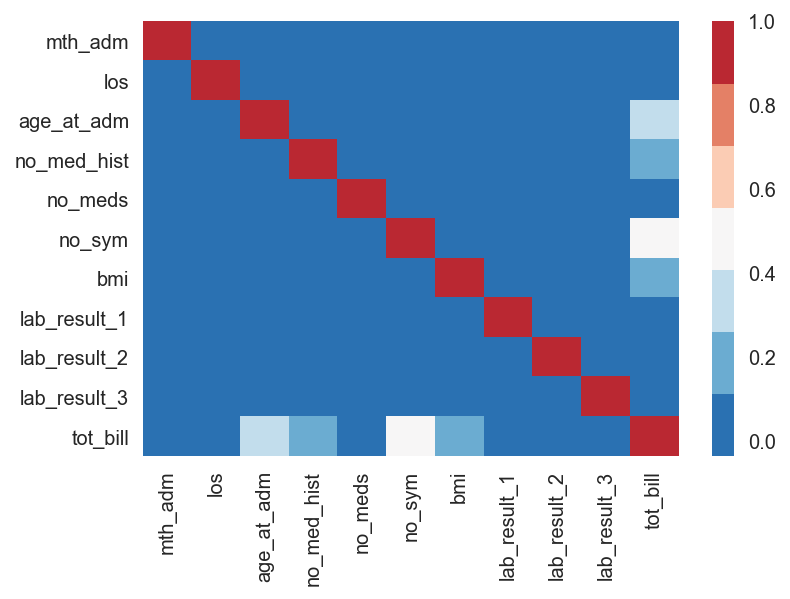

In [187]:
# a quick summary of our continuous variables

# sns.set(rc={"figure.figsize": (15, 10)})

corr = df[con_col+target].corr()
cmap = sns.color_palette("RdBu_r", 7)

sns.heatmap(corr,cmap=cmap)

The lighter blue areas shows some evidence that there seems to be some variables with small positive correlation to the total bill.

**bmi** : To a certain extent, it is logical that the higher the bmi, the higher the total bill due to higher health risk. However, a low bmi may have a risk of nutritional deficiency that may lead to more complications. We will examine a similar variable - bmi_risk later on.

**no_med_hist**/**no_sym** : The more medical history and symptoms, the more medication, procedures will be required.

**age at adm** : Geriatric patients tend to have more co-morbidities, complications, more medication, procedures thus requiring more medical attention.

However, **length of stay** is definitely unusual. The longer the patient stays inpatient, the higher the ward cost, hence higher bill?
The assumption here, is that the total bill in this data does not take into account ward costs. (?)

In [188]:
# Pearson Corrleation Coefficient
print ('R: ',stats.pearsonr(df['los'], df['tot_bill'])[0])
print ('P-value: ',stats.pearsonr(df['los'], df['tot_bill'])[1])

R:  0.009005747664634451
P-value:  0.5996260372400146


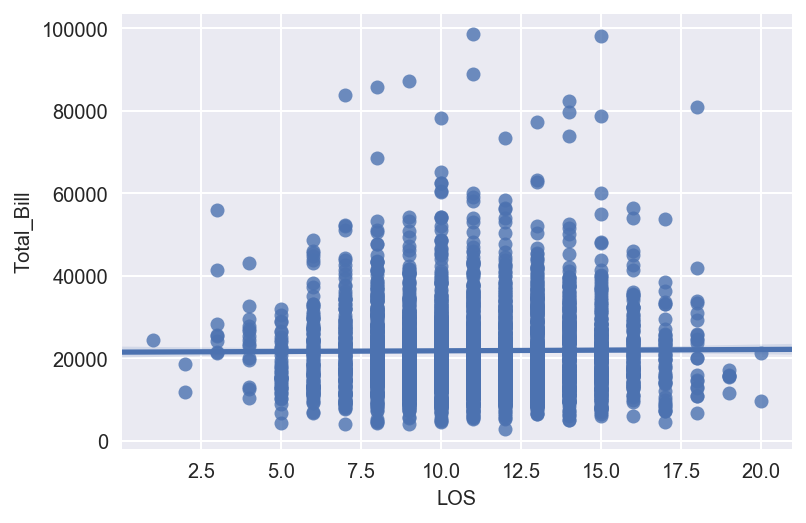

In [189]:
b = sns.regplot(df['los'],df['tot_bill'])
b.set_xlabel("LOS",fontsize=10)
b.set_ylabel("Total_Bill",fontsize=10)

** Target Variable **

The distribution of the data is highly skewed to the right. A natural log is applied to the data to ensure approximate normality.

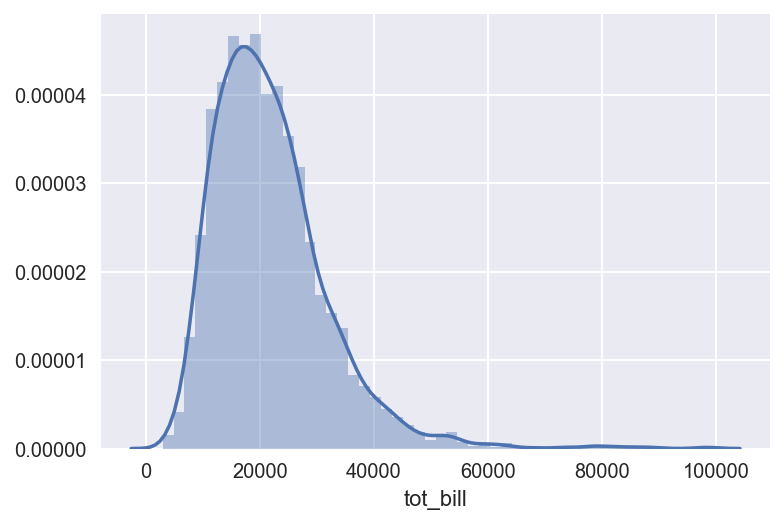

p-value (Sharpiro-Wilk Test):  7.132609183413319e-43


In [190]:
# Sharpiro-Wilk Test for Normality

sns.distplot(df['tot_bill'])
plt.show()
print ('p-value (Sharpiro-Wilk Test): ',stats.shapiro(df['tot_bill'])[1])

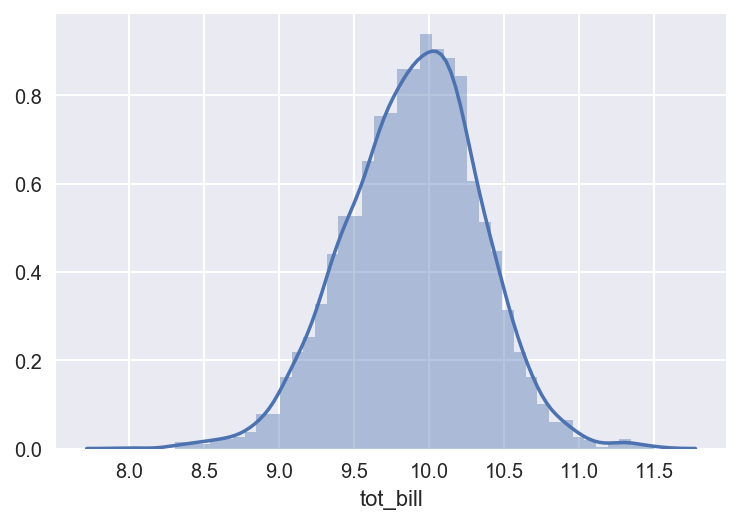

p-value (Sharpiro-Wilk Test):  2.660954805833171e-06


In [191]:
# Sharpiro-Wilk Test for Normality

sns.distplot(np.log(df['tot_bill']))
plt.show()
print ('p-value (Sharpiro-Wilk Test): ',stats.shapiro(np.log(df['tot_bill']))[1])


Now that looks better !

In [192]:
# create new target variable
df['log_bill'] = np.log(df['tot_bill'])

# Demographics Analysis
** Gender, Resident Status, Race, Age **

In [193]:
# demographics analysis

demo_col = ['yr_adm','gender_c','resident_status_c','race_c','age_bin']

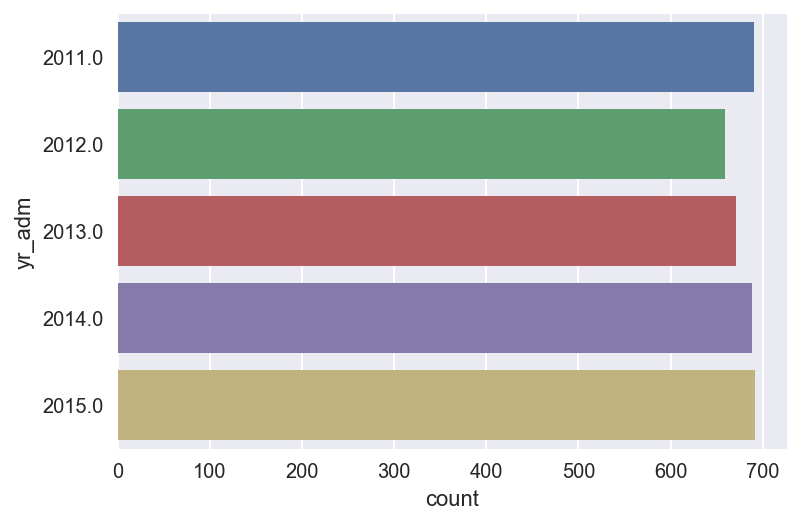


Value Count:
yr_adm
2011.0    670
2012.0    645
2013.0    658
2014.0    664
2015.0    677
Name: patient_id, dtype: int64

Mean Total Bills:
yr_adm
2011.0    21386.932420
2012.0    21666.662731
2013.0    22062.990134
2014.0    22538.677645
2015.0    21639.669884
Name: tot_bill, dtype: float64

Mean Average Bills:
yr_adm
2011.0    2086.809725
2012.0    2102.713627
2013.0    2219.629285
2014.0    2218.698314
2015.0    2104.400462
Name: avg_bill, dtype: float64



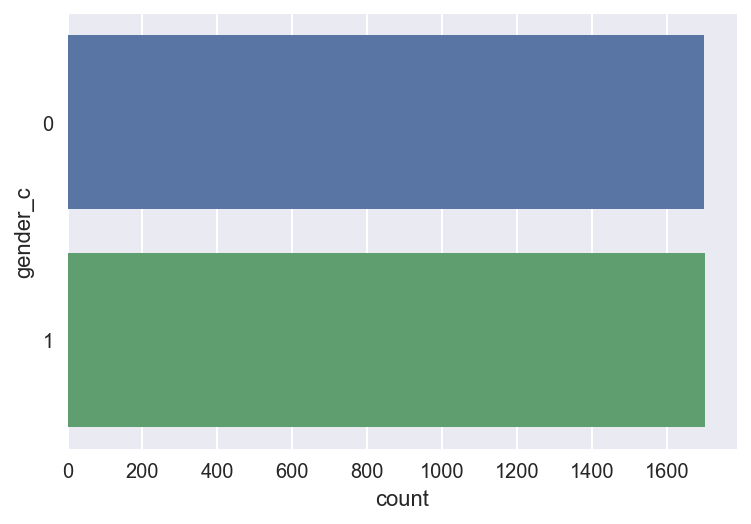


Value Count:
gender_c
0    1503
1    1497
Name: patient_id, dtype: int64

Mean Total Bills:
gender_c
0    22446.032656
1    21273.489318
Name: tot_bill, dtype: float64

Mean Average Bills:
gender_c
0    2215.037108
1    2077.870029
Name: avg_bill, dtype: float64



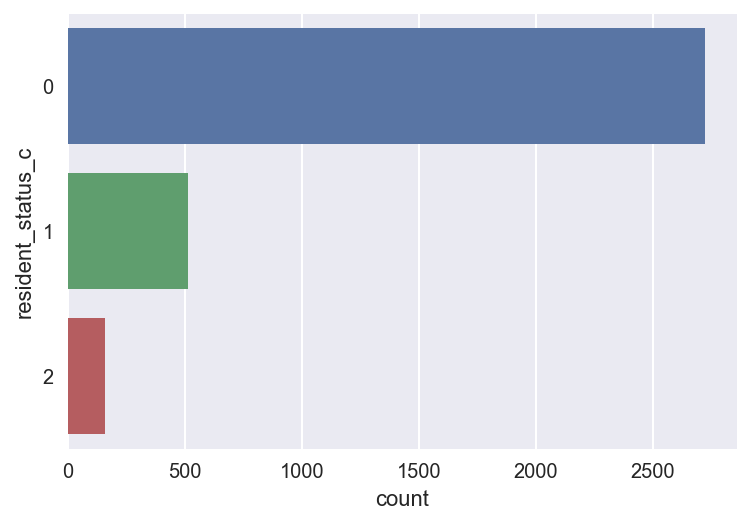


Value Count:
resident_status_c
0    2392
1     465
2     143
Name: patient_id, dtype: int64

Mean Total Bills:
resident_status_c
0    20211.437074
1    24370.057942
2    41703.775404
Name: tot_bill, dtype: float64

Mean Average Bills:
resident_status_c
0    1998.896560
1    2301.249883
2    4146.148323
Name: avg_bill, dtype: float64



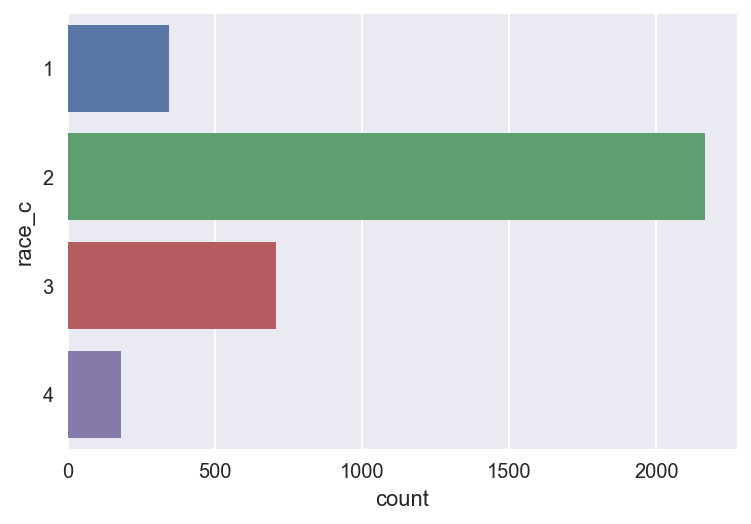


Value Count:
race_c
1     295
2    1915
3     629
4     161
Name: patient_id, dtype: int64

Mean Total Bills:
race_c
1    23682.724680
2    19118.897909
3    29506.016223
4    21320.757596
Name: tot_bill, dtype: float64

Mean Average Bills:
race_c
1    2327.581105
2    1873.065383
3    2892.479406
4    2158.127541
Name: avg_bill, dtype: float64



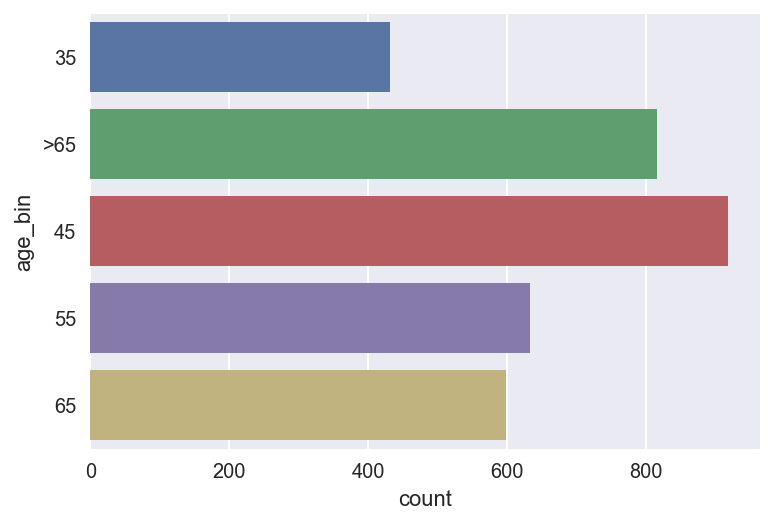


Value Count:
age_bin
35     386
45     825
55     570
65     544
>65    723
Name: patient_id, dtype: int64

Mean Total Bills:
age_bin
35     16515.426481
45     19499.673460
55     21015.751722
65     24723.928798
>65    25891.522558
Name: tot_bill, dtype: float64

Mean Average Bills:
age_bin
35     1638.382199
45     1882.177780
55     2109.642765
65     2438.472104
>65    2526.458568
Name: avg_bill, dtype: float64



In [194]:
# descriptive analysis for demographics data

for c in demo_col:
    sns.countplot(y = df[c])
    plt.show()
    print()
    print('Value Count:')
    print(df.groupby(c)['patient_id'].nunique())
    print()
    print('Mean Total Bills:')
    print(df.groupby(c)['tot_bill'].mean())
    print()
    print('Mean Average Bills:')
    print (df.groupby(c)['avg_bill'].mean())
    print()

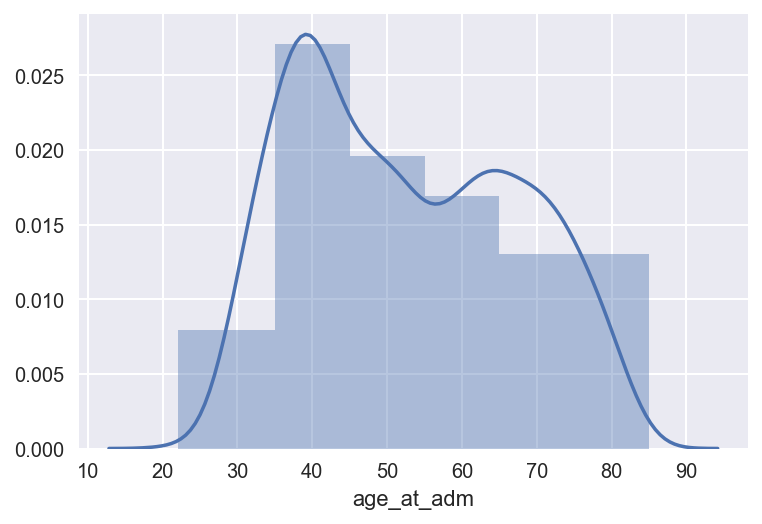

In [195]:
# distribution plot for age of admission

sns.distplot(df['age_at_adm'],bins=[22,35,45,55,65,max(df['age_at_adm'])])
plt.show()
print()

###########################
Shapiro-Wilk Test for Normality.
###########################

1
(0.8960528373718262, 1.8956550873818078e-32)
Since pvalue is < 0.01, we reject the null hypothesis that the distribution = normal distribution at 0.01 significance level.



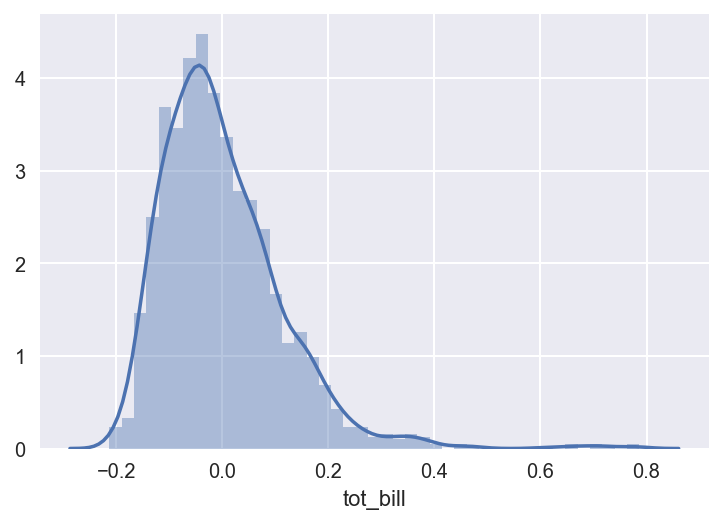

0
(0.8980882167816162, 3.7026435175018536e-32)
Since pvalue is < 0.01, we reject the null hypothesis that the distribution = normal distribution at 0.01 significance level.



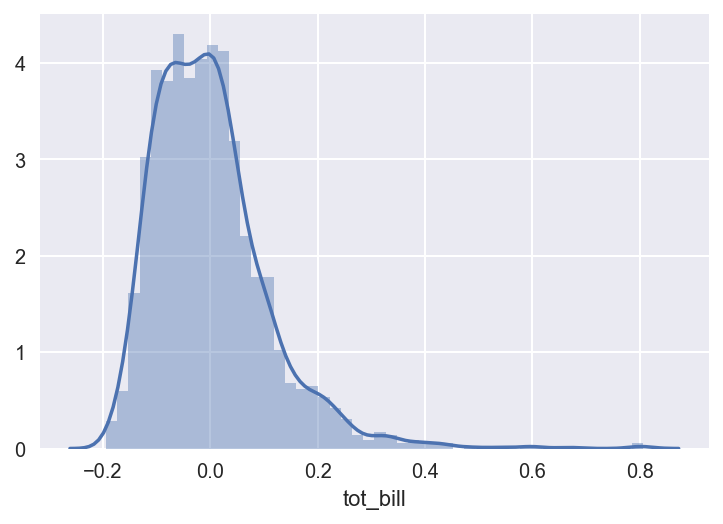

###########################
Levene's Test for Homogeneity of Variances
###########################

LeveneResult(statistic=0.8475548722431483, pvalue=0.3573103267626675)
Since pvalue is > 0.01, we are unable to reject the null hypothesis at 0.01 significance level. We conclude that there is insufficient evidence to claim that the variances are not equal.
PASS



In [196]:
# Test for Statistical assumptions

df_dict = {}
df_dict_ss = {}

print('###########################')
print('Shapiro-Wilk Test for Normality.')
print('###########################')
print()

for u in df['gender_c'].unique():
    print (u)
    df_dict[u] = df[df['gender_c']==u]['tot_bill']
    
    #test for normality
    np.random.seed(4321)
    
    df_dict_ss[u] = (df_dict[u] - df_dict[u].mean()) / (df_dict[u].max() - df_dict[u].min())
    print(stats.shapiro(df_dict_ss[u]))
    sns.distplot(df_dict_ss[u])
    
    if stats.shapiro(df_dict_ss[u])[1] < 0.01:
        print('Since pvalue is < 0.01, we reject the null hypothesis that the distribution = normal distribution at 0.01 significance level.')
        print()
    else:
        print('Since pvalue is > 0.01, we are unable to reject the null hypothesis that the distribution = normal distribution at 0.01 significance level.')
        print('PASS')
        print()
        
    plt.show()
    
print('###########################')
print("Levene's Test for Homogeneity of Variances")
print('###########################')
print()
#test for Homogeneity of Variances
print (stats.levene(df_dict[1],df_dict[0]))

if stats.levene(df_dict[1],df_dict[0])[1] < 0.01:
    print('Since pvalue is < 0.01, we reject the null hypothesis at 0.01 significance level.')
else:
    print('Since pvalue is > 0.01, we are unable to reject the null hypothesis at 0.01 significance level. We conclude that there is insufficient evidence to claim that the variances are not equal.')
    print('PASS')
print()

###########################
Shapiro-Wilk Test for Normality.
###########################

1
(0.9959327578544617, 0.0001545810082461685)
Since pvalue is < 0.01, we reject the null hypothesis that the distribution = normal distribution at 0.01 significance level.



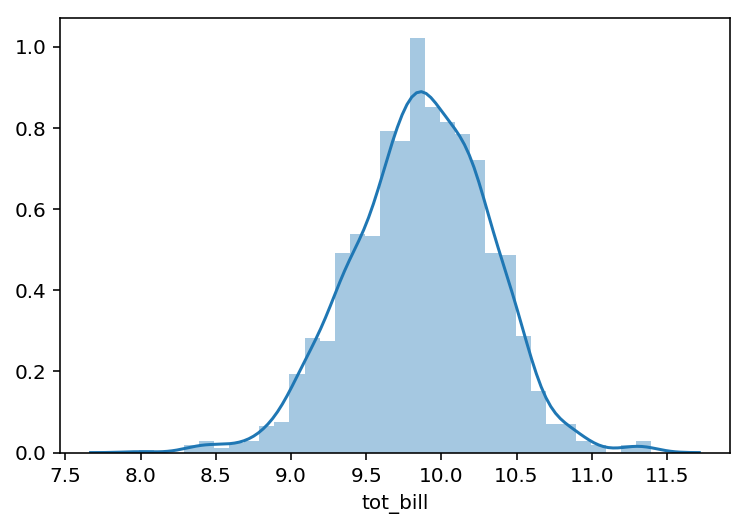

0
(0.9971295595169067, 0.003257955890148878)
Since pvalue is < 0.01, we reject the null hypothesis that the distribution = normal distribution at 0.01 significance level.



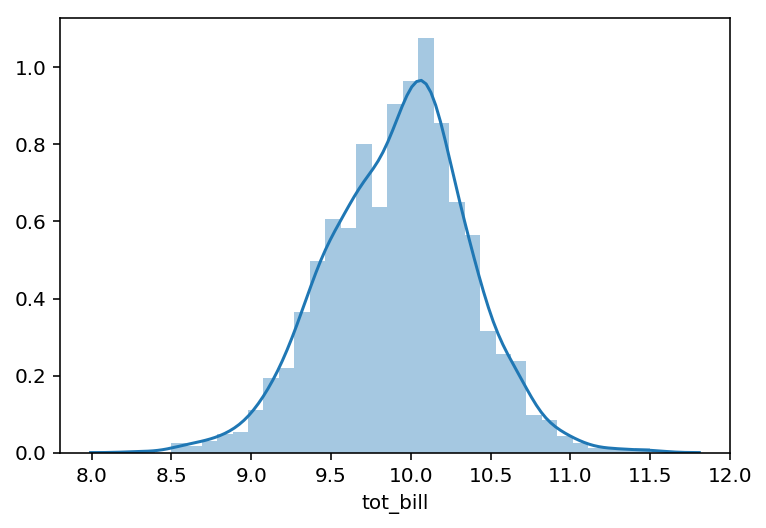

###########################
Levene's Test for Homogeneity of Variances
###########################

LeveneResult(statistic=0.8475548722431483, pvalue=0.3573103267626675)
Since pvalue is > 0.01, we are unable to reject the null hypothesis at 0.01 significance level. We conclude that there is insufficient evidence to claim that the variances are not equal.
PASS



In [131]:
# Test for Statistical assumptions

df_dict = {}
df_dict_ss = {}

print('###########################')
print('Shapiro-Wilk Test for Normality.')
print('###########################')
print()

for u in df['gender_c'].unique():
    print (u)
    df_dict[u] = df[df['gender_c']==u]['tot_bill']
    
    #test for normality
    np.random.seed(4321)
    
    df_dict_ss[u] = np.log(df_dict[u])
    print(stats.shapiro(df_dict_ss[u]))
    sns.distplot(df_dict_ss[u])
    
    if stats.shapiro(df_dict_ss[u])[1] < 0.01:
        print('Since pvalue is < 0.01, we reject the null hypothesis that the distribution = normal distribution at 0.01 significance level.')
        print()
    else:
        print('Since pvalue is > 0.01, we are unable to reject the null hypothesis that the distribution = normal distribution at 0.01 significance level.')
        print('PASS')
        print()
        
    plt.show()
    
print('###########################')
print("Levene's Test for Homogeneity of Variances")
print('###########################')
print()
#test for Homogeneity of Variances
print (stats.levene(df_dict[1],df_dict[0]))

if stats.levene(df_dict[1],df_dict[0])[1] < 0.01:
    print('Since pvalue is < 0.01, we reject the null hypothesis at 0.01 significance level.')
else:
    print('Since pvalue is > 0.01, we are unable to reject the null hypothesis at 0.01 significance level. We conclude that there is insufficient evidence to claim that the variances are not equal.')
    print('PASS')
print()

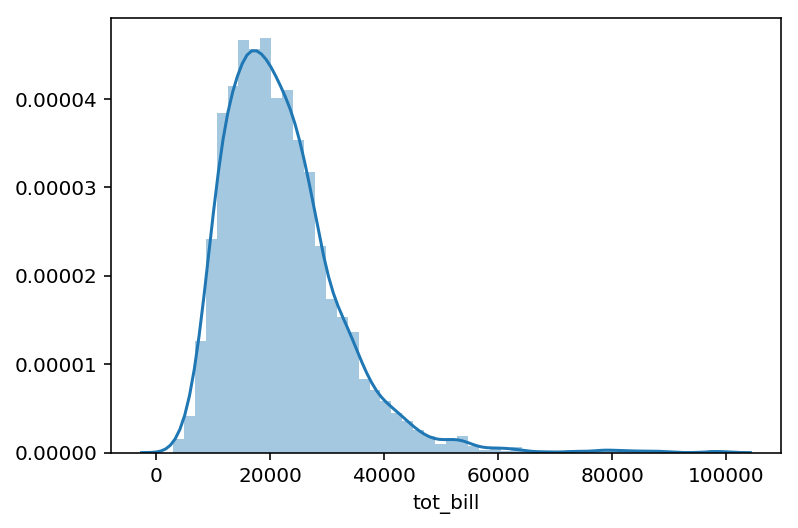

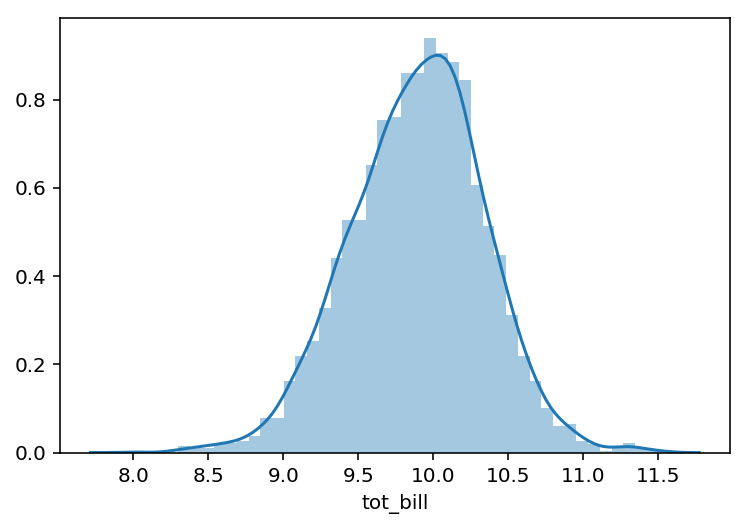

In [128]:
sns.distplot(np.log(df['tot_bill']))

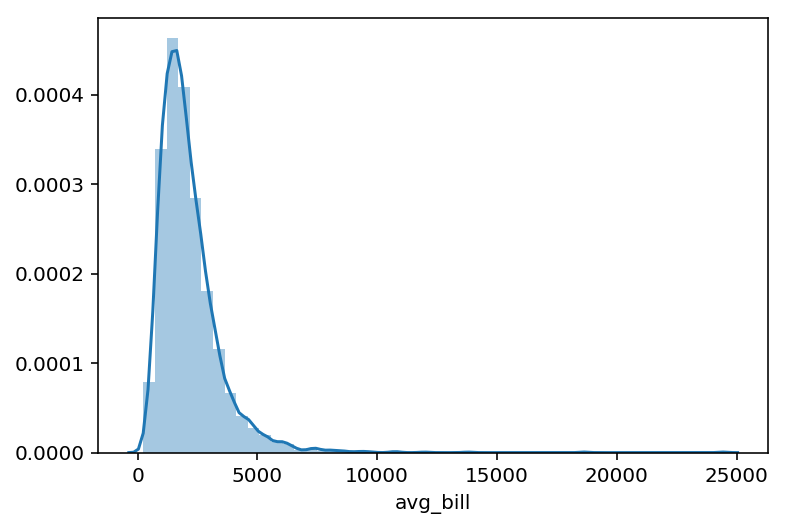

In [115]:
sns.distplot(df['avg_bill'])

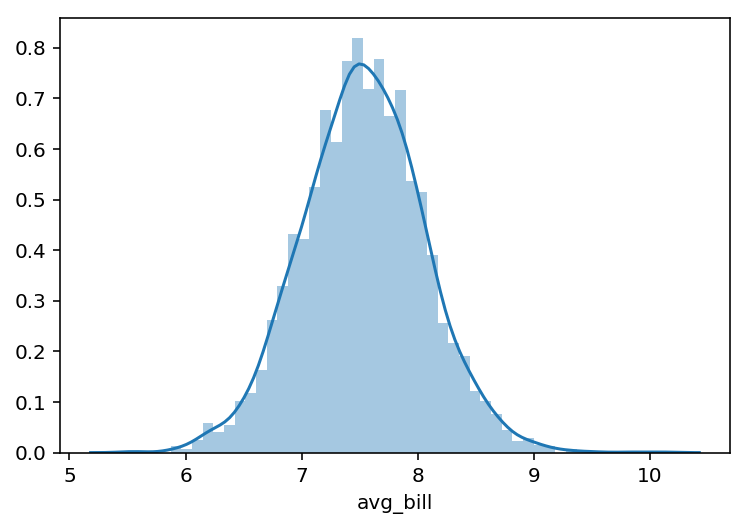

In [129]:
sns.distplot(np.log(df['avg_bill']))

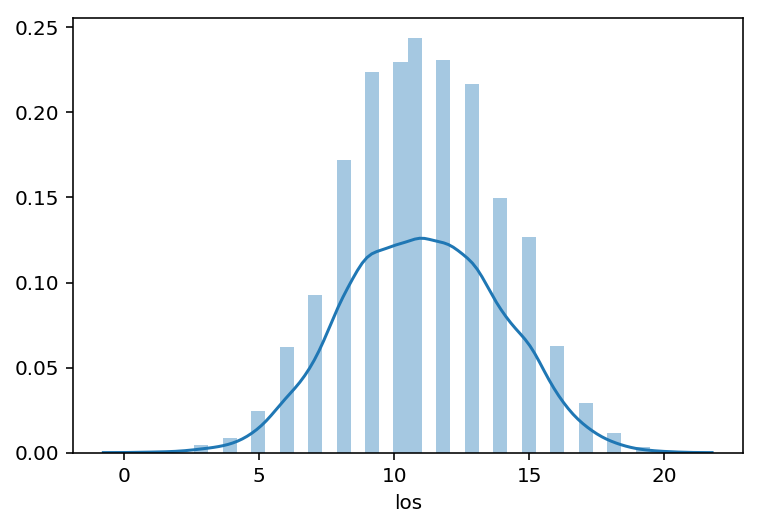

In [91]:
sns.distplot(df['los'])

** Variance Inflation Factor **

Using the variance inflation factor(VIF), we will be able to estimate how much the variance of a regression coefficient of a particular feature is inflated due to multicollinearity.
<br><br>
The VIF ranges from 1 (1 being not correlated). We have set a threshold of 5, any features with VIF > 5 will be eliminated from the modeling.
<br><br>
$$VIF = \frac{1}{1 - R_{i}^{2}}$$
where $i = x_{1},x_{2}..x_{n}$

In [ ]:
# Variance Inflation Factor

class VIF(BaseEstimator, TransformerMixin):
    """Variance Inflation Factor"""
    
    def __init__(self,threshold=5):
        self.threshold = threshold
    
    
    def vif(self,df):
        
        vif = [variance_inflation_factor(df.iloc[:,:-4].values,i) \
               for i in range(df.iloc[:,:-4].shape[1])]
        
        vif_df = pd.DataFrame(df.iloc[:,:-4].columns,columns=['Features'])
        vif_df['VIF'] = vif    # VIF values in dataframe
        
        remove_col = list(vif_df[vif_df['VIF']>self.threshold]['Features'])   # Choose only features with VIF < 5
        selected_df = df.drop(remove_col,axis=1)
        
        return selected_df
    
    def transform(self, df, *args):
        
        selected_df = self.vif(df)
        
        return selected_df


    def fit(self, df, *args):
        return self